In [5]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
import pandas as pd

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

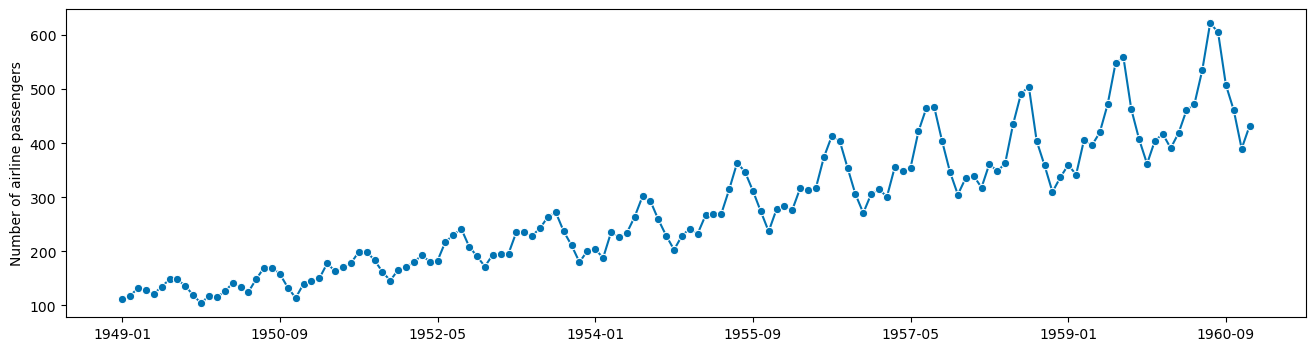

In [2]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [6]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)
fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [7]:
cutoff = pd.Period("1960-12", freq="M")

# Naive forecasting 

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

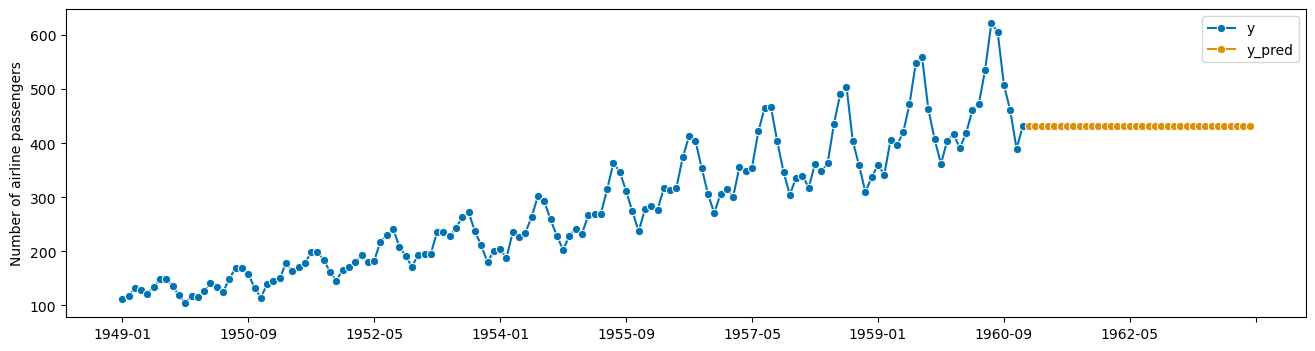

In [9]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y)
y_pred = forecaster.predict(fh)
# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

# Facebook prophet

14:57:08 - cmdstanpy - INFO - Chain [1] start processing
14:57:09 - cmdstanpy - INFO - Chain [1] done processing


0.07135763776675716

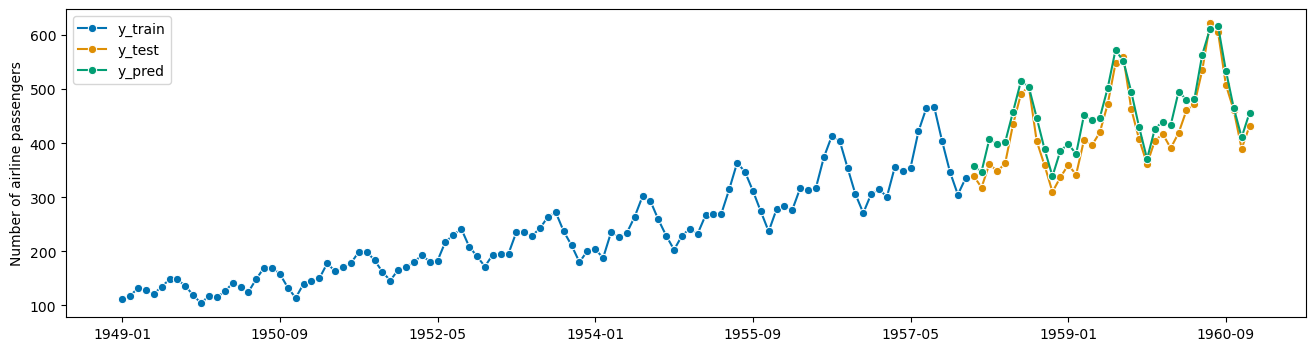

In [12]:
# imports necessary for this chapter
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series

# data loading for illustration (see section 1 for explanation)
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Convert index to pd.DatetimeIndex
z = y.copy()
z = z.to_timestamp(freq="M")
z_train, z_test = temporal_train_test_split(z, test_size=36)
forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

forecaster.fit(z_train)
y_pred = forecaster.predict(fh.to_relative(cutoff=y_train.index[-1]))
y_pred.index = y_test.index

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

# ARIMA ?

# XGBoost

In [ ]:
from sktime.forecasting.compose import make_reduction
from xgboost import XGBRegressor

regressor = XGBRegressor(...)
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# Neural network (LSTM)

In [ ]:
# importing necessary libraries
from sktime.datasets import load_longley
from sktime.forecasting.neuralforecast import NeuralForecastRNN
from sktime.split import temporal_train_test_split
# loading the Longley dataset and splitting it into train and test subsets
y, X = load_longley()
y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, test_size=4)
# creating model instance configuring the hyperparameters
model = NeuralForecastRNN(  
    "A-DEC", futr_exog_list=["ARMED", "POP"], max_steps=5
)
# fitting the model
model.fit(y_train, X=X_train, fh=[1, 2, 3, 4])  
# getting point predictions
model.predict(X=X_test)  

Seed set to 1
